In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
import pandas as pd

import histlite as hl


In [33]:
datadir = '/p/lustre2/lenardo1/sensitivity_output/Mar1_Rn222_CriticalLambda_D024/'

dflist = []

for i in range(10):
    datafilename = 'critical_lambda_calculation_rn222study_01.0x_D-024_num_sig_0011.0_file_{}.h5'.format(i)
    dflist.append(pd.read_hdf(datadir+datafilename))
    
    
df = pd.concat(dflist,ignore_index=True)



In [34]:
df.head()

,best_fit_converged,best_fit_covar,best_fit_errors,best_fit_iterations,best_fit_nll,best_fit_parameters,fixed_fit_converged,fixed_fit_covar,fixed_fit_errors,fixed_fit_iterations,fixed_fit_parameters,input_parameters,lambda,num_signal
0,True,True,"{'Num_Far': 563.313047401291, 'Num_Vessel_U238...",1,-5.130746,"{'Num_Far': 3494.1796883762418, 'Num_Vessel_U2...",True,True,"{'Num_Far': 435.27834582141486, 'Num_Vessel_U2...",2,"{'Num_Far': 3496.0163016718975, 'Num_Vessel_U2...","{'Num_Far': 4080.242155595832, 'Num_Vessel_U23...",0.079573,11.0
1,True,True,"{'Num_Far': 320.0402833154403, 'Num_Vessel_U23...",1,-5.809585,"{'Num_Far': 5239.164511690701, 'Num_Vessel_U23...",True,True,"{'Num_Far': 314.6248875112324, 'Num_Vessel_U23...",2,"{'Num_Far': 5237.714638568734, 'Num_Vessel_U23...","{'Num_Far': 4966.179940323911, 'Num_Vessel_U23...",0.123708,11.0
2,True,True,"{'Num_Far': 519.1364136361033, 'Num_Vessel_U23...",1,-7.435321,"{'Num_Far': 3735.228862760379, 'Num_Vessel_U23...",True,True,"{'Num_Far': 527.98937354546, 'Num_Vessel_U238'...",1,"{'Num_Far': 3730.666747427552, 'Num_Vessel_U23...","{'Num_Far': 4143.772522663499, 'Num_Vessel_U23...",0.440204,11.0
3,True,True,"{'Num_Far': 430.9727196676163, 'Num_Vessel_U23...",2,-1.843348,"{'Num_Far': 5149.193782561239, 'Num_Vessel_U23...",True,True,"{'Num_Far': 286.8689181867644, 'Num_Vessel_U23...",5,"{'Num_Far': 5147.450370005296, 'Num_Vessel_U23...","{'Num_Far': 5261.762966560411, 'Num_Vessel_U23...",0.338738,11.0
4,True,True,"{'Num_Far': 496.8703769803642, 'Num_Vessel_U23...",1,-12.362975,"{'Num_Far': 3556.7929154365092, 'Num_Vessel_U2...",True,True,"{'Num_Far': 338.9482563605534, 'Num_Vessel_U23...",2,"{'Num_Far': 3578.479514239946, 'Num_Vessel_U23...","{'Num_Far': 4488.938927299206, 'Num_Vessel_U23...",6.724449,11.0


In [45]:
def ExtractParameterFitValuesToDict(pull_df):
    variable_names_list = list(pull_df['best_fit_parameters'].iloc[0].keys())
    
    parameter_fit_dict = {}
    parameter_input_dict = {}
    parameter_error_dict = {}
    
    for var_name in variable_names_list:
        parameter_fit_dict[var_name] = []
        parameter_input_dict[var_name] = []
        parameter_error_dict[var_name] = []
        
    for index,row in pull_df.iterrows():
        
        if row['best_fit_converged'] and row['best_fit_covar'] \
            and row['fixed_fit_converged'] and row['fixed_fit_covar'] \
            and row['best_fit_nll'] < 5.:
        
            for i in range(len(variable_names_list)):

                var_name = variable_names_list[i]

                parameter_fit_dict[var_name].append(row['best_fit_parameters'][var_name])
                parameter_error_dict[var_name].append(row['best_fit_errors'][var_name])
                parameter_input_dict[var_name].append(row['input_parameters'][var_name])
            
    return parameter_fit_dict, parameter_error_dict, parameter_input_dict

In [50]:
fit_dict, error_dict, input_dict = ExtractParameterFitValuesToDict(df)


In [47]:
print(fit_dict.keys())

dict_keys(['Num_Far', 'Num_Vessel_U238', 'Num_Vessel_Th232', 'Num_Internals_U238', 'Num_Internals_Th232', 'Num_Rn222', 'Num_FullTPC_K40', 'Num_B8nu', 'Num_FullLXeBb2n', 'Num_FullLXeBb0n', 'Num_Xe137_and_Ar42'])


Num_Far              correlation coeffcient with BB0n: -0.003502
Num_Vessel_U238      correlation coeffcient with BB0n: -0.02378
Num_Vessel_Th232     correlation coeffcient with BB0n: -0.01989
Num_Internals_U238   correlation coeffcient with BB0n: -0.006725
Num_Internals_Th232  correlation coeffcient with BB0n: 0.002738
Num_Rn222            correlation coeffcient with BB0n: 0.03628
Num_FullTPC_K40      correlation coeffcient with BB0n: 0.006315
Num_B8nu             correlation coeffcient with BB0n: 0.01116
Num_FullLXeBb2n      correlation coeffcient with BB0n: 0.004053
Num_FullLXeBb0n      correlation coeffcient with BB0n:  1.0
Num_Xe137_and_Ar42   correlation coeffcient with BB0n: -0.08788


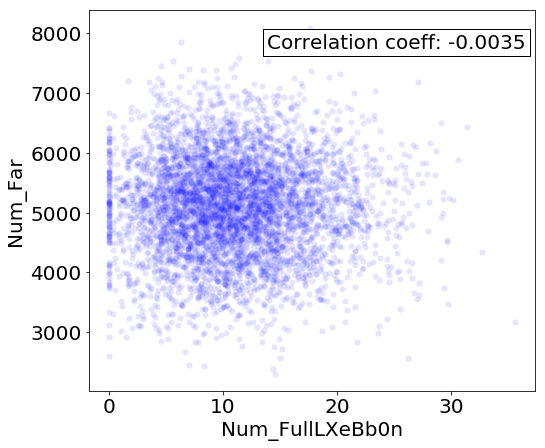

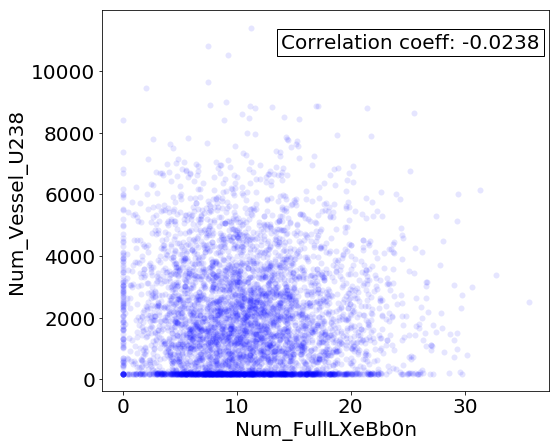

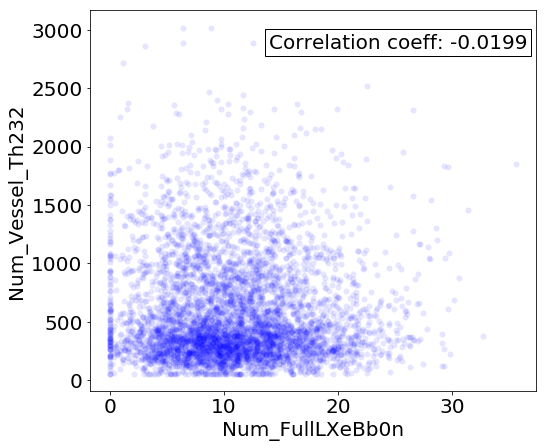

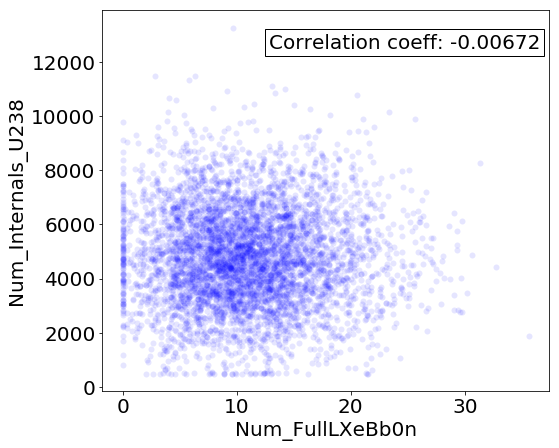

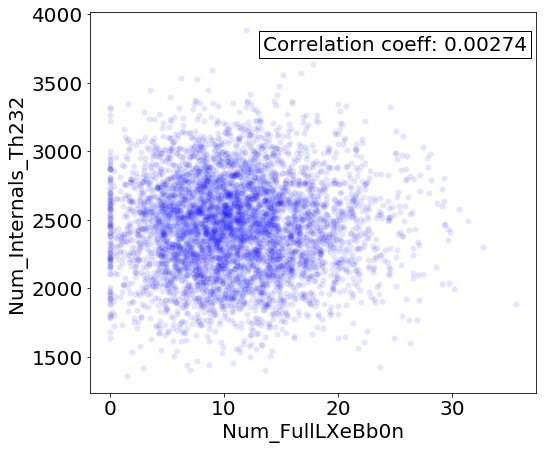

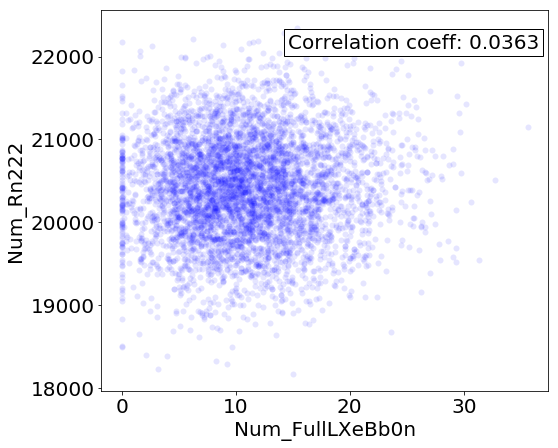

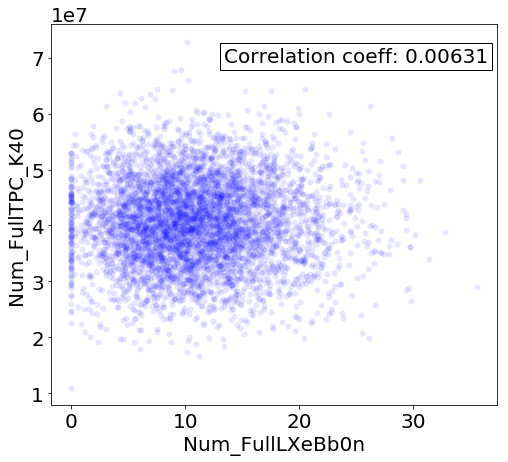

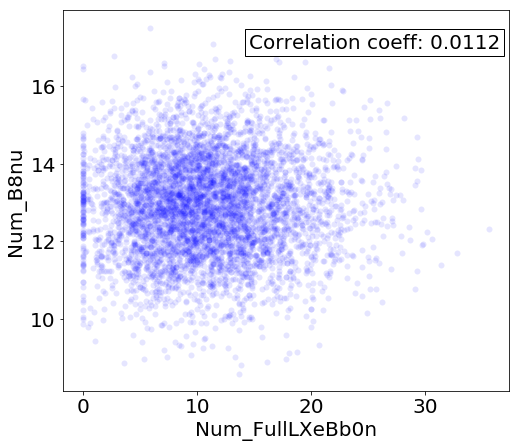

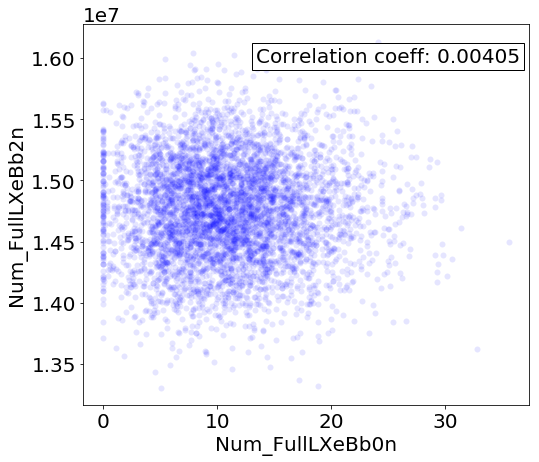

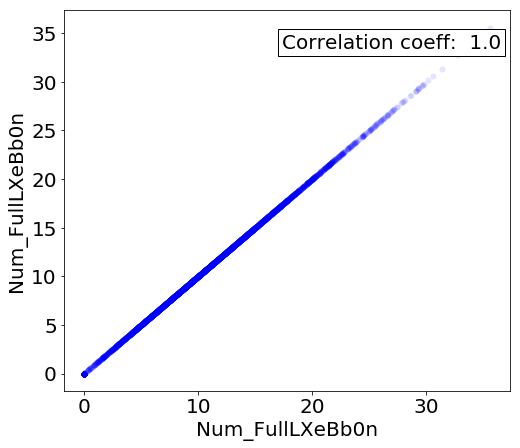

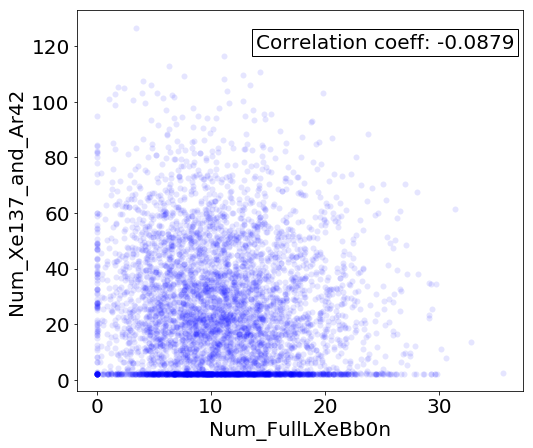

In [48]:
plt.rcParams['figure.figsize'] = (8,7)
plt.rcParams['font.size'] = 20

from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('correlation_plots_11_signal_counts.pdf')


signame = 'Num_FullLXeBb0n'

counter = 0

correlation_coeffs = {}

for par in fit_dict.keys():
    plt.figure(counter)
    plt.plot()
    plt.ylabel(str(par))
    plt.plot(fit_dict['Num_FullLXeBb0n'],fit_dict[par],'o',\
             color=(0.,0.,1.,0.1),markeredgecolor=(0.,0.,0.,0.))
    plt.xlabel(signame)
#     if 'Rn222' in par:
#         plt.ylim(18000.,23000.)
    
    corrcoeff = np.corrcoef(np.vstack((fit_dict['Num_FullLXeBb0n'],fit_dict[par])))
    
    print('{:<20} correlation coeffcient with BB0n: {:4.4}'.format(par,corrcoeff[0,1]))
    
    plt.text(0.98,0.9,\
             'Correlation coeff: {:4.3}'.format(corrcoeff[0,1]),\
            transform=plt.gca().transAxes,\
            ha='right',\
            bbox={'facecolor':(1.,1.,1.,1.),'edgecolor':(0.,0.,0.,1.)})
    
    correlation_coeffs[par]=corrcoeff[0,1]
    

    
    pdf.savefig(bbox_inches='tight')
    
    counter+=1
    
pdf.close()
    

In [49]:
sorted_dict = {k: v for k, v in sorted(correlation_coeffs.items(), \
                                       key=lambda item: 1./np.abs(item[1]))}


for k,v in sorted_dict.items():
    print('{:<20} {:<10.4} (absolute value: {:<10.4})'.format(k+':',v,np.abs(v)))

Num_FullLXeBb0n:     1.0        (absolute value: 1.0       )
Num_Xe137_and_Ar42:  -0.08788   (absolute value: 0.08788   )
Num_Rn222:           0.03628    (absolute value: 0.03628   )
Num_Vessel_U238:     -0.02378   (absolute value: 0.02378   )
Num_Vessel_Th232:    -0.01989   (absolute value: 0.01989   )
Num_B8nu:            0.01116    (absolute value: 0.01116   )
Num_Internals_U238:  -0.006725  (absolute value: 0.006725  )
Num_FullTPC_K40:     0.006315   (absolute value: 0.006315  )
Num_FullLXeBb2n:     0.004053   (absolute value: 0.004053  )
Num_Far:             -0.003502  (absolute value: 0.003502  )
Num_Internals_Th232: 0.002738   (absolute value: 0.002738  )


# Subtracting out the input variations

Num_Far              correlation coeffcient with BB0n: 0.008634
Num_Vessel_U238      correlation coeffcient with BB0n: -0.02511
Num_Vessel_Th232     correlation coeffcient with BB0n: -0.008462
Num_Internals_U238   correlation coeffcient with BB0n: -0.01261
Num_Internals_Th232  correlation coeffcient with BB0n: 0.01314
Num_Rn222            correlation coeffcient with BB0n: 0.03628
Num_FullTPC_K40      correlation coeffcient with BB0n: 0.009056
Num_B8nu             correlation coeffcient with BB0n: 0.01024
Num_FullLXeBb2n      correlation coeffcient with BB0n: 0.01198
Num_FullLXeBb0n      correlation coeffcient with BB0n:  1.0
Num_Xe137_and_Ar42   correlation coeffcient with BB0n: -0.087


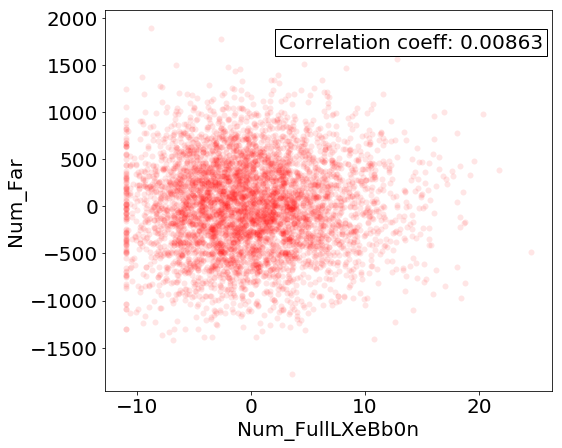

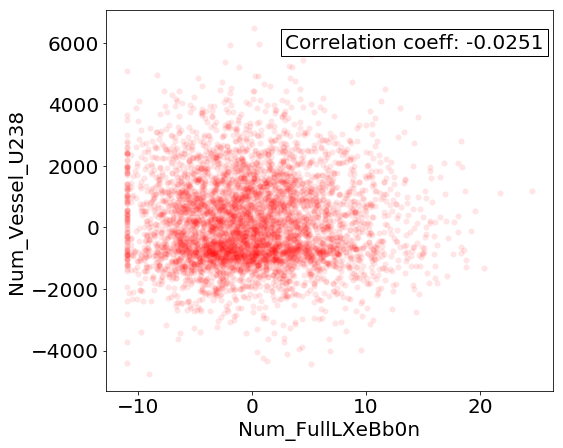

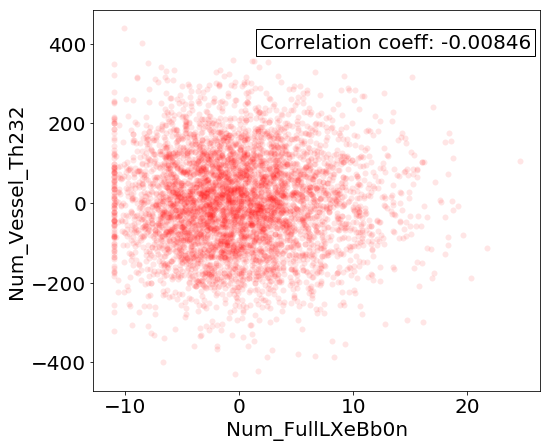

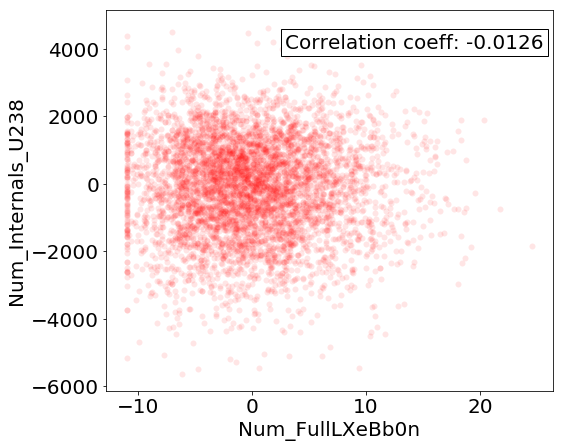

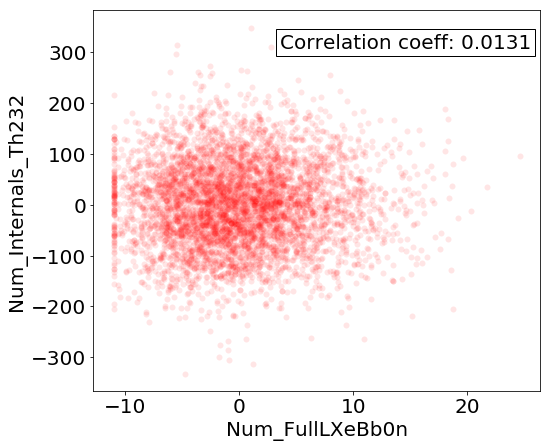

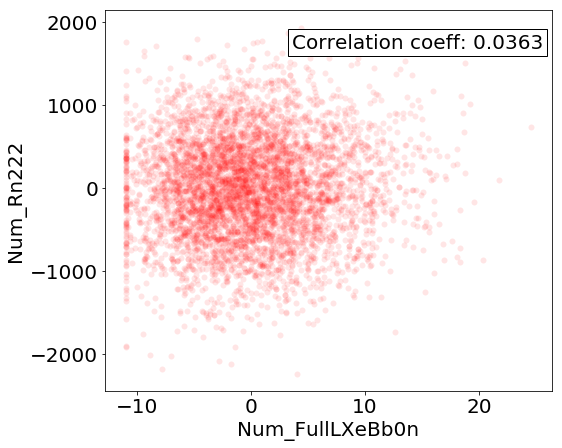

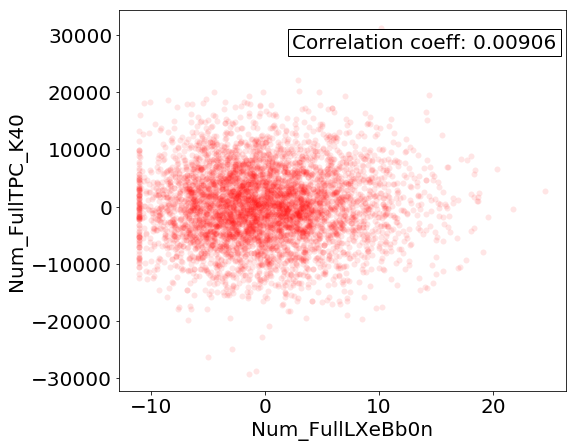

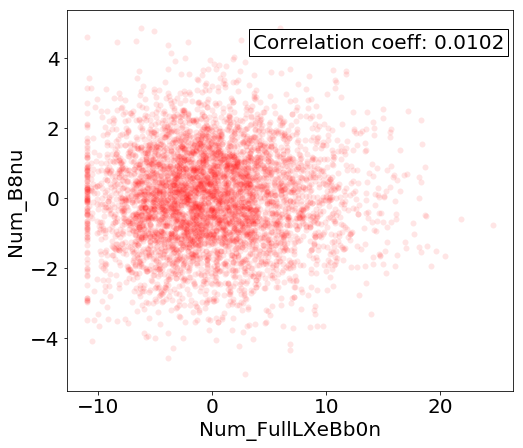

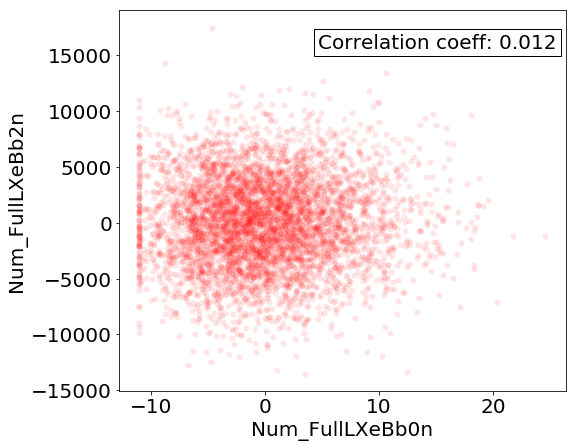

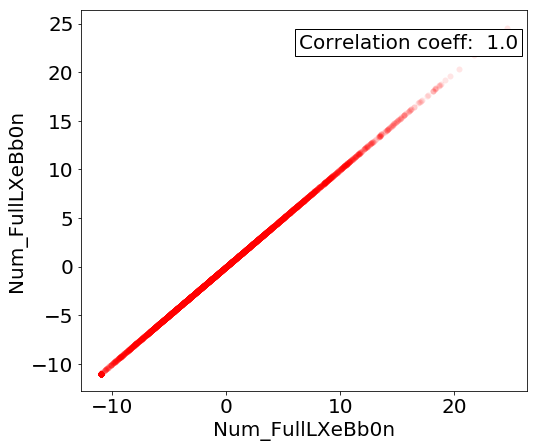

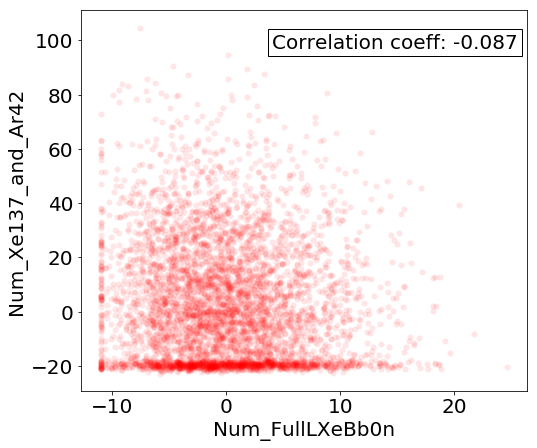

In [57]:
plt.rcParams['figure.figsize'] = (8,7)
plt.rcParams['font.size'] = 20

from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('correlation_plots_11_signal_counts_inputs_subtracted.pdf')


signame = 'Num_FullLXeBb0n'

counter = 0

correlation_coeffs = {}

for par in fit_dict.keys():
    plt.figure(counter)
    plt.plot()
    plt.ylabel(str(par))
    plt.plot(np.array(fit_dict['Num_FullLXeBb0n'])-np.array(input_dict['Num_FullLXeBb0n']),\
             np.array(fit_dict[par])-np.array(input_dict[par]),'o',\
             color=(1.,0.,0.,0.1),markeredgecolor=(0.,0.,0.,0.))
    plt.xlabel(signame)
#     if 'Rn222' in par:
#         plt.ylim(18000.,23000.)
    
    corrcoeff = np.corrcoef( np.vstack( \
                    (np.array(fit_dict['Num_FullLXeBb0n'])-np.array(input_dict['Num_FullLXeBb0n']),\
                     np.array(fit_dict[par])-np.array(input_dict[par]))))
    
    print('{:<20} correlation coeffcient with BB0n: {:4.4}'.format(par,corrcoeff[0,1]))
    
    plt.text(0.98,0.9,\
             'Correlation coeff: {:4.3}'.format(corrcoeff[0,1]),\
            transform=plt.gca().transAxes,\
            ha='right',\
            bbox={'facecolor':(1.,1.,1.,1.),'edgecolor':(0.,0.,0.,1.)})
    
    correlation_coeffs[par]=corrcoeff[0,1]
    

    
    pdf.savefig(bbox_inches='tight')
    
    counter+=1
    
pdf.close()

In [58]:
sorted_dict = {k: v for k, v in sorted(correlation_coeffs.items(), \
                                       key=lambda item: 1./np.abs(item[1]))}


for k,v in sorted_dict.items():
    print('{:<20} {:<10.4} (absolute value: {:<10.4})'.format(k+':',v,np.abs(v)))

Num_FullLXeBb0n:     1.0        (absolute value: 1.0       )
Num_Xe137_and_Ar42:  -0.087     (absolute value: 0.087     )
Num_Rn222:           0.03628    (absolute value: 0.03628   )
Num_Vessel_U238:     -0.02511   (absolute value: 0.02511   )
Num_Internals_Th232: 0.01314    (absolute value: 0.01314   )
Num_Internals_U238:  -0.01261   (absolute value: 0.01261   )
Num_FullLXeBb2n:     0.01198    (absolute value: 0.01198   )
Num_B8nu:            0.01024    (absolute value: 0.01024   )
Num_FullTPC_K40:     0.009056   (absolute value: 0.009056  )
Num_Far:             0.008634   (absolute value: 0.008634  )
Num_Vessel_Th232:    -0.008462  (absolute value: 0.008462  )
